## Importing dependencies

In [1]:
#For Data collecting and Cleaning
import pandas as pd
import numpy as np

#For Preprocessing
# import re
# import nltk
# nltk.download("stopwords")
# from nltk.corpus import stopwords
# from nltk.stem.porter import *
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

#For Datavisualization
import matplotlib.pyplot as plt
import seaborn as sns

#For Model Creation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

/tmp/ipykernel_12997/186334957.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-02-17 11:36:48.713247: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-17 11:36:48.794156: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-17 11:36:48.794225: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin 

In [2]:
import warnings
warnings. filterwarnings('ignore')

## Collecting Data

In [3]:
df = pd.read_csv("emotions.csv", index_col=False)

In [4]:
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [5]:
df.columns

Index(['# mean_0_a', 'mean_1_a', 'mean_2_a', 'mean_3_a', 'mean_4_a',
       'mean_d_0_a', 'mean_d_1_a', 'mean_d_2_a', 'mean_d_3_a', 'mean_d_4_a',
       ...
       'fft_741_b', 'fft_742_b', 'fft_743_b', 'fft_744_b', 'fft_745_b',
       'fft_746_b', 'fft_747_b', 'fft_748_b', 'fft_749_b', 'label'],
      dtype='object', length=2549)

In [6]:
df.shape

(2132, 2549)

In [7]:
df['label'].value_counts()

label
NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: count, dtype: int64

## Data Visualization

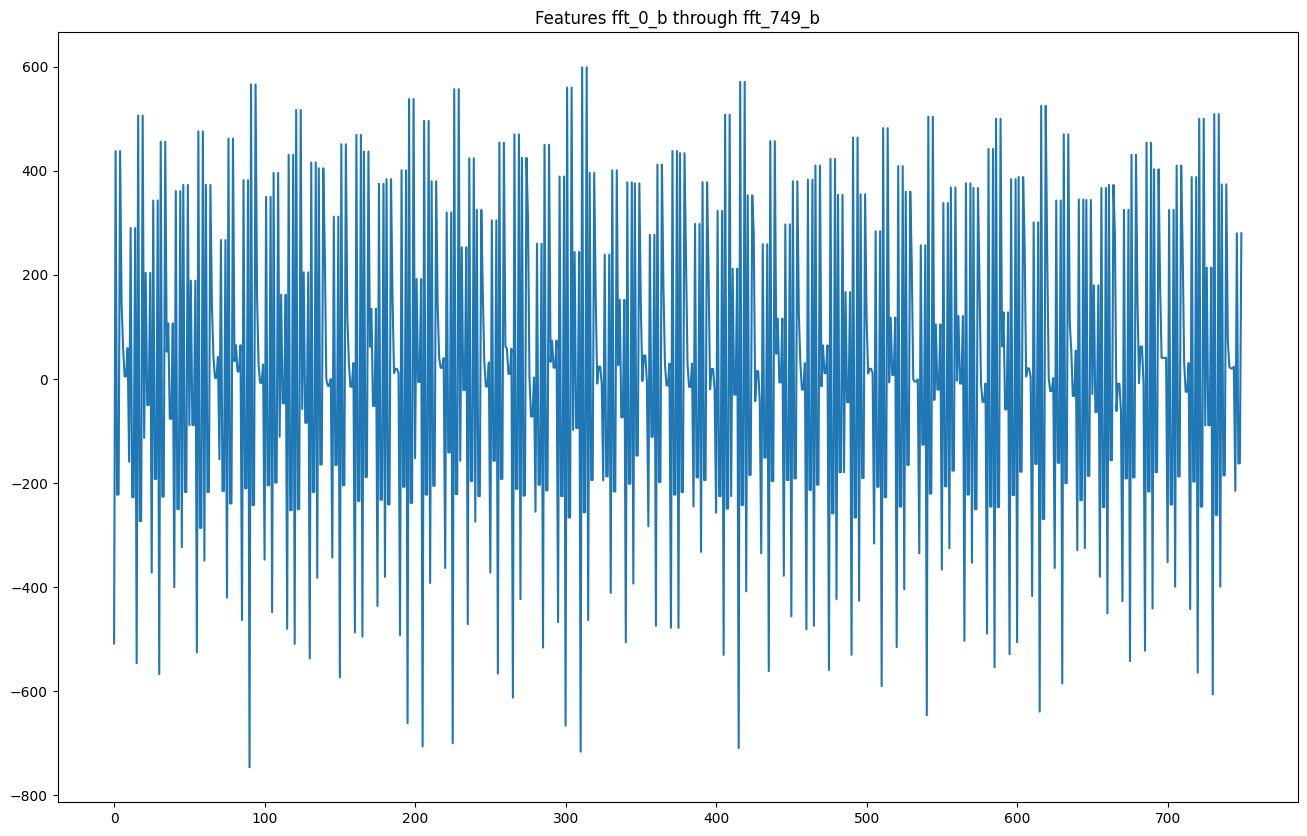

In [8]:
sample = df.loc[0, 'fft_0_b':'fft_749_b']

plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b")
plt.show()

In [9]:
#Seprarting Positive,Neagtive and Neutral dataframes for plotting
pos = df.loc[df["label"]=="POSITIVE"]
sample_pos = pos.loc[2, 'fft_0_b':'fft_749_b']
neg = df.loc[df["label"]=="NEGATIVE"]
sample_neg = neg.loc[0, 'fft_0_b':'fft_749_b']
neu = df.loc[df["label"]=="NEUTRAL"]
sample_neu = neu.loc[1, 'fft_0_b':'fft_749_b']



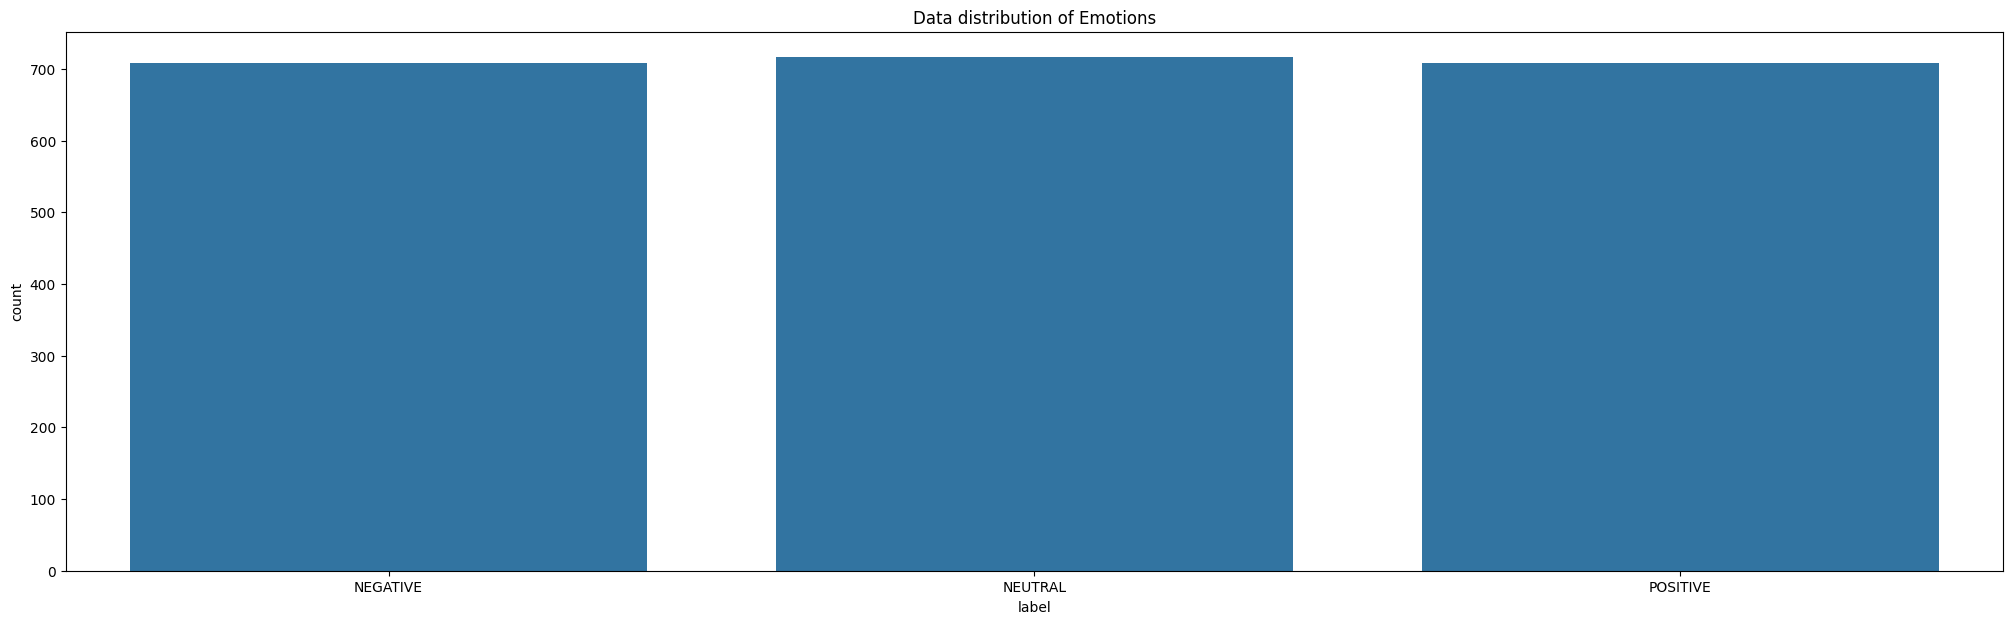

In [10]:
#plottintg Dataframe distribution
plt.figure(figsize=(25,7))
plt.title("Data distribution of Emotions")
plt.style.use('fivethirtyeight')
sns.countplot(x='label', data=df)
plt.show()

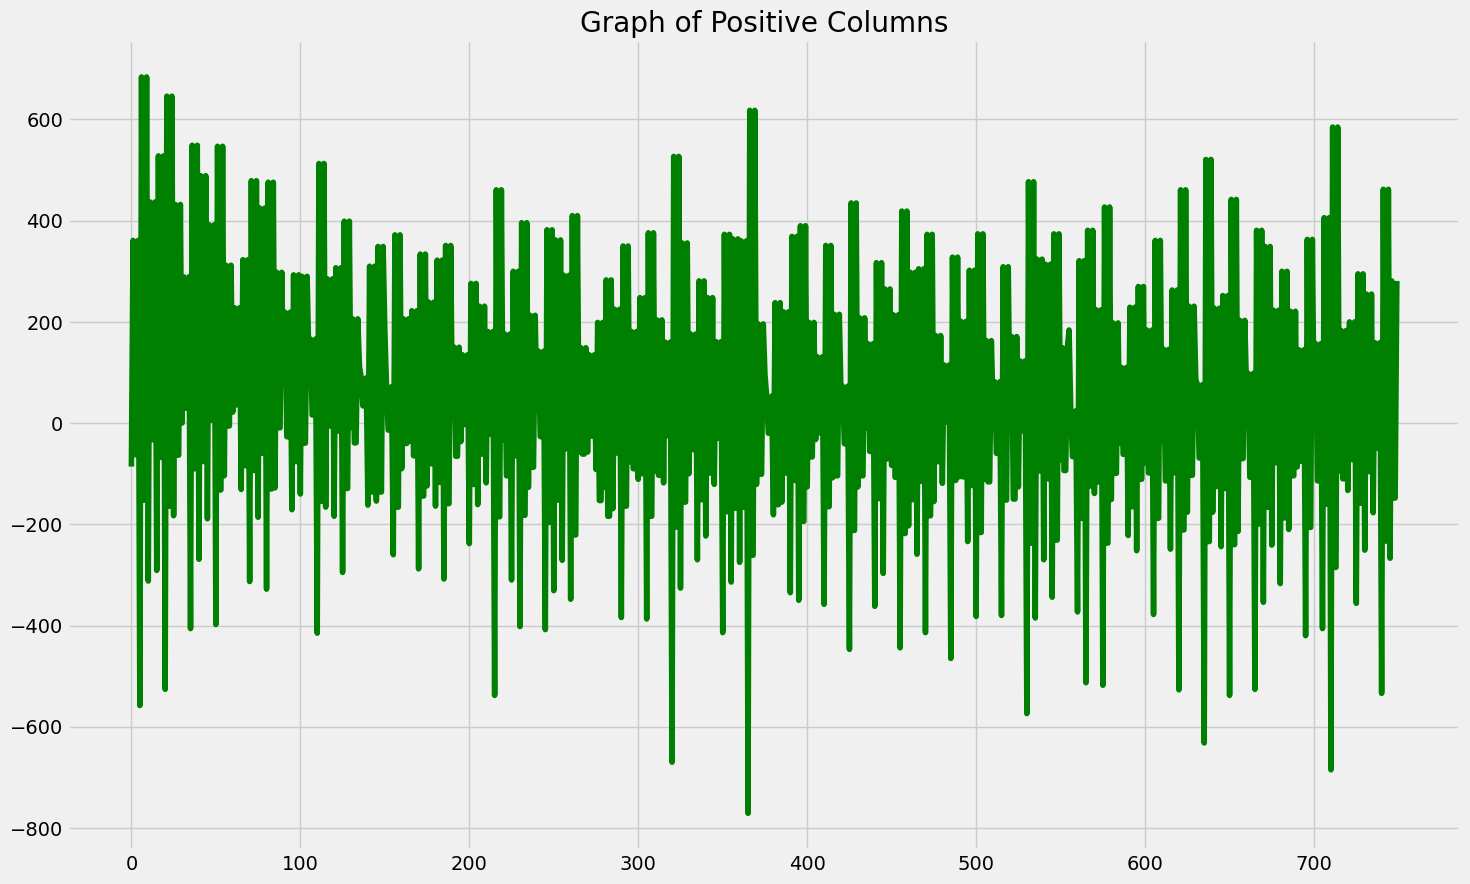

In [11]:
#Plotting Positive DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_pos)), sample_pos, color='green')
plt.title("Graph of Positive Columns")
plt.show()

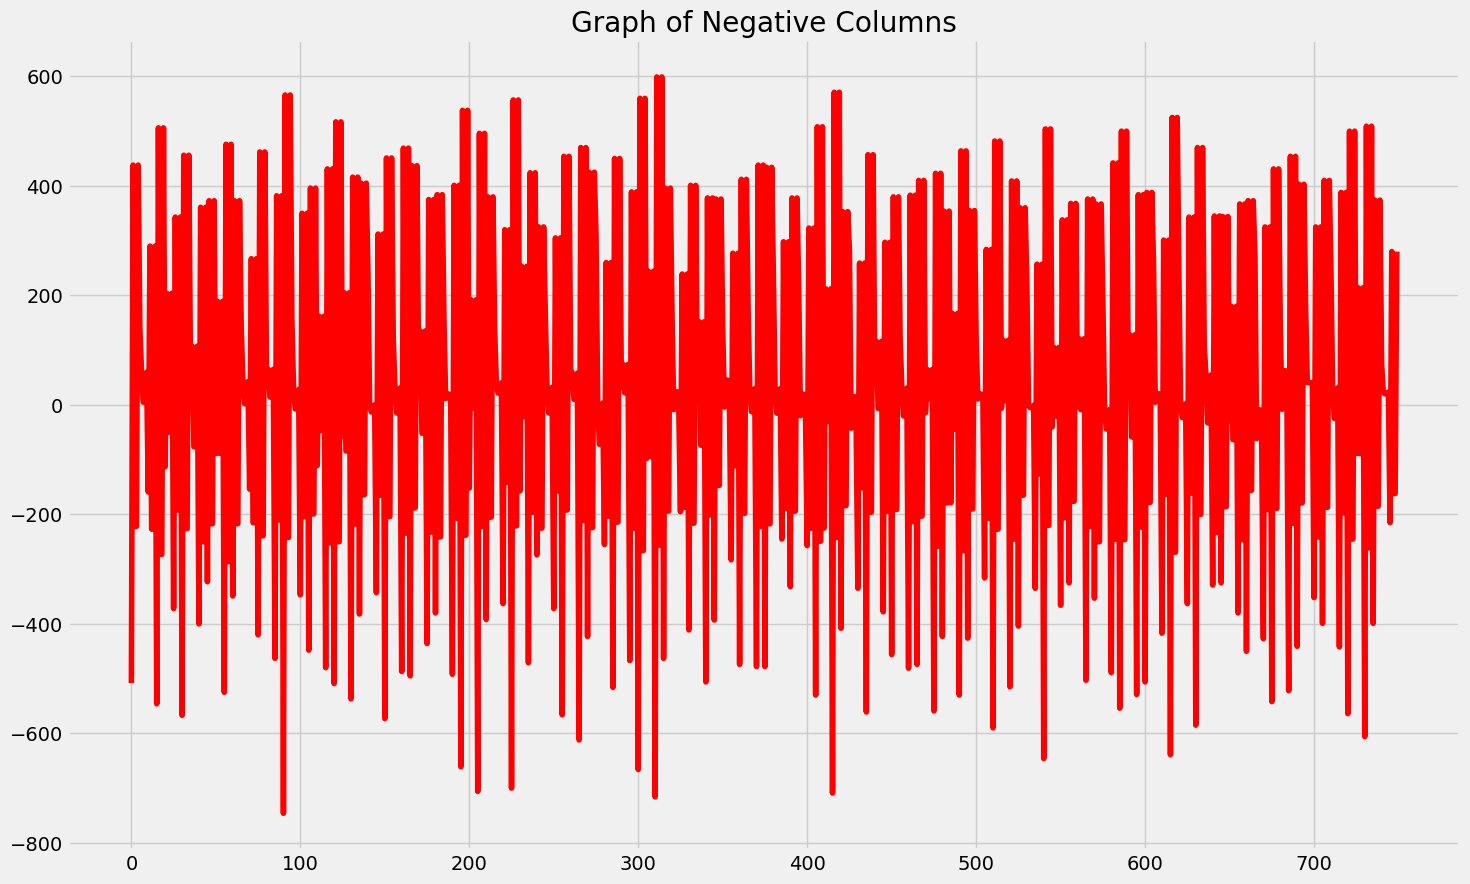

In [12]:
#Plotting Negative DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_pos)), sample_neg, color='red')
plt.title("Graph of Negative Columns")
plt.show()

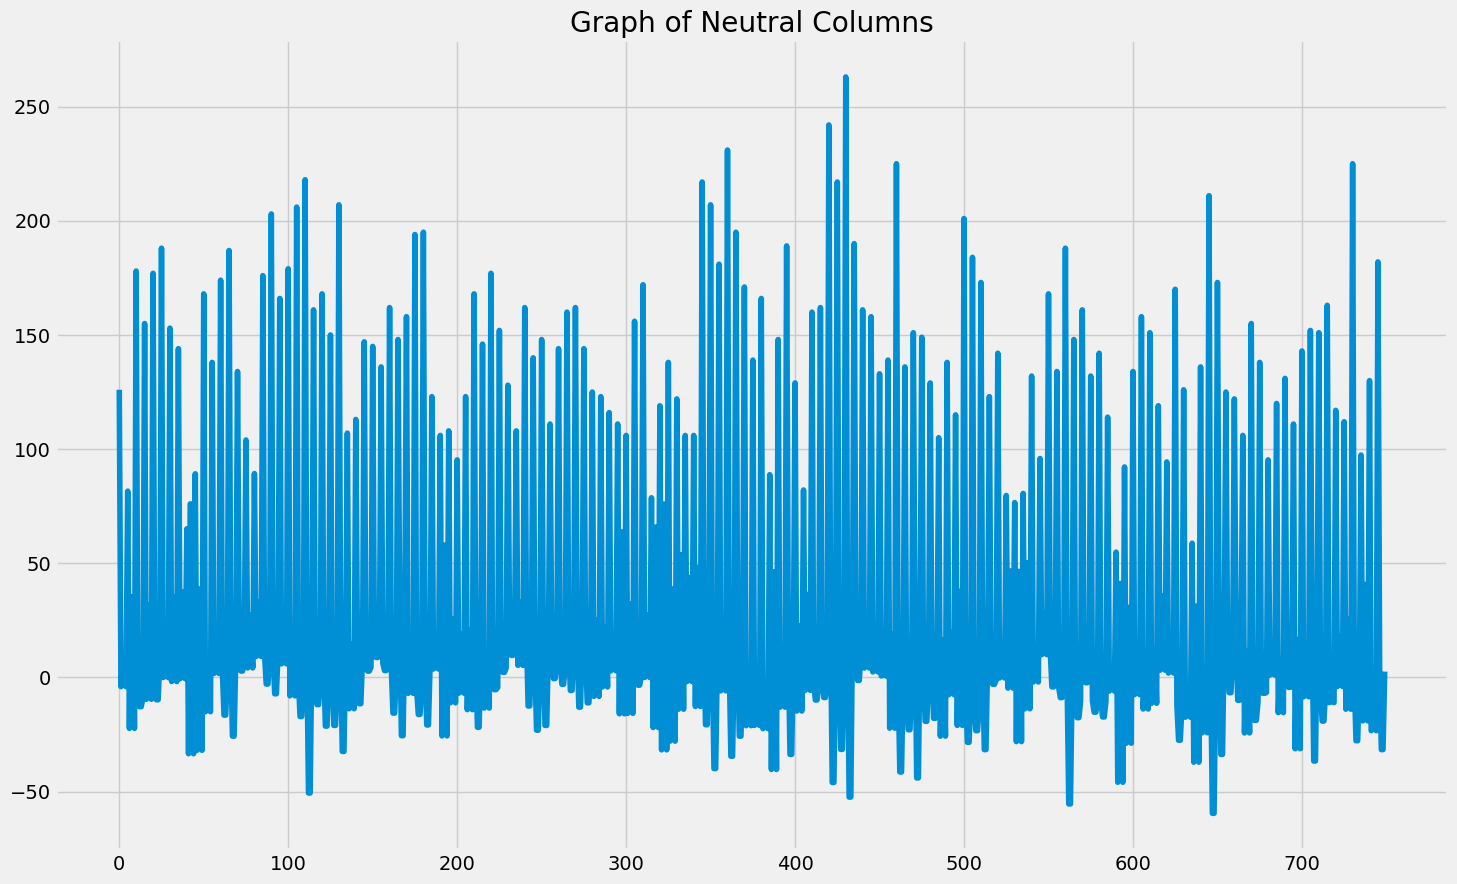

In [13]:
#Plotting Neutral DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_neu)), sample_neu)
plt.title("Graph of Neutral Columns")
plt.show()

## Data Preprocessing

In [14]:
def Transform_Data(df):

    #Transforming Labels to Numbers
    df['label'] = df['label'].map({"NEUTRAL":0,"POSITIVE":1,"NEGATIVE":2})
    x = df.drop('label', axis=1)
    y = df.loc[:, 'label'].values

    #Scaling Brain Signals
    scalar = StandardScaler()
    scalar.fit(x)
    X = scalar.transform(x)
    
    #one hot encoding labels
    Y = to_categorical(y)

    return X, Y

In [15]:
X, Y = Transform_Data(df)

## Data Spliting

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=8)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=8)
print("\nX_train & Y_train shape -->  ", X_train.shape, " ", Y_train.shape)
print("\nX_val & Y_val shape -->  ", X_val.shape, " ", Y_val.shape)
print("\nX_test & Y_test shape -->  ", X_test.shape, " ", Y_test.shape)


X_train & Y_train shape -->   (1278, 2548)   (1278, 3)

X_val & Y_val shape -->   (427, 2548)   (427, 3)

X_test & Y_test shape -->   (427, 2548)   (427, 3)


## Model Building

In [21]:
def create_model():
    #input layer of model for brain signals
    inputs = tf.keras.Input(shape=(X_train.shape[1],))
    #Hidden Layer for Brain signal using LSTM(GRU)
    expand_dims = tf.expand_dims(inputs, axis=2)

    gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
    #Flatten Gru layer into vector form (one Dimensional array)
    flatten = tf.keras.layers.Flatten()(gru)
    #output latyer of Model
    outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)
    

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    print(model.summary())
    return model


In [22]:
#cretaing model
lstmmodel = create_model()
#Compiling model 
lstmmodel.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2548)]            0         
                                                                 
 tf.expand_dims (TFOpLambda  (None, 2548, 1)           0         
 )                                                               
                                                                 
 gru (GRU)                   (None, 2548, 256)         198912    
                                                                 
 flatten (Flatten)           (None, 652288)            0         
                                                                 
 dense (Dense)               (None, 3)                 1956867   
                                                                 
Total params: 2155779 (8.22 MB)
Trainable params: 2155779 (8.22 MB)
Non-trainable params: 0 (0.00 Byte)
_______________________

In [ ]:
history = lstmmodel.fit(X_train, Y_train, epochs = 10, validation_data=(X_val,Y_val))
loss, acc = lstmmodel.evaluate(X_test, Y_test)

2024-02-17 13:44:43.109637: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 13025376 exceeds 10% of free system memory.


Epoch 1/10


2024-02-17 13:44:56.019175: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 83492864 exceeds 10% of free system memory.
2024-02-17 13:44:56.619168: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 83492864 exceeds 10% of free system memory.
2024-02-17 13:44:58.443694: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 83492864 exceeds 10% of free system memory.
2024-02-17 13:44:59.953544: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 83492864 exceeds 10% of free system memory.


 4/40 [==>...........................] - ETA: 10:13 - loss: 0.7928 - accuracy: 0.7344